## Methods to initialize patches data structure  

In [1]:
%matplotlib inline
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import face
# from features3D import PatchExtractor3D
from tomo_encoders import Patches
import pandas as pd
import numpy as np

In [2]:
# vol_shape = (351, 2500,65)
vol_shape = (351, 350, 340)

In [3]:
def plot_3D_feature(p, fig, plot_type = 'centers', ife = 0):
    
    ax = fig.add_subplot(projection='3d')
    
    if plot_type == 'centers':
        ax.scatter(p.centers()[:,0], p.centers()[:,1], p.centers()[:,2], c = p.features[:,ife])
    elif plot_type == 'corners':
        ax.scatter(p.points[:,0], p.points[:,1], p.points[:,2], c = p.features[:,ife])
        
    ax.set_xlim3d(0, p.vol_shape[0])
    ax.set_ylim3d(0, p.vol_shape[1])
    ax.set_zlim3d(0, p.vol_shape[2])    
    return

def plot_2D_planes(p, ax):
    
    ivals = [(0, 1, 2), (1, 0, 2), (2, 0, 1)]

    for ival in ivals:
        ip, i1, i2 = ival
        ax[ip].scatter(p.centers()[:,i1], p.centers()[:,i2], c = p.widths[:,0])
        ax[ip].set_xlim([0, vol_shape[i1]])
        ax[ip].set_ylim([0, vol_shape[i1]])    
        
def plot_2D_patches(p, ax):
    ax.scatter(p.centers()[:,0], p.centers()[:,1], c = p.widths[:,0])
    ax.set_xlim([0, vol_shape[0]])
    ax.set_ylim([0, vol_shape[1]])    

**test initialization with multiple widths on a grid**

(243, 3)


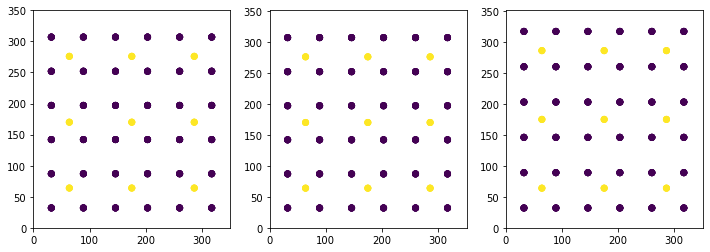

In [4]:
model_size = (64,64,64)
kwargs = {"initialize_by" : 'multiple-grids',
          "min_patch_size" : model_size, \
          "max_stride" : 2, "n_points" : None}
p_grid = Patches(vol_shape, **kwargs)
print(p_grid.points.shape)
fig, ax = plt.subplots(1,3, figsize = (12,4))
plot_2D_planes(p_grid, ax)
p_grid._check_valid_points()

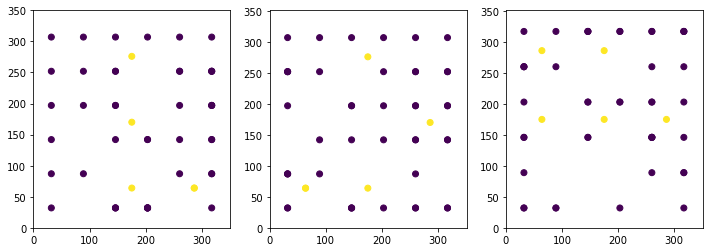

In [5]:
p3d = p_grid.select_random_sample(50)
fig, ax = plt.subplots(1,3, figsize = (12,4))
plot_2D_planes(p3d, ax)

In [6]:
z_idxs = p3d.points[:,0]
p2d = Patches(tuple(vol_shape[1:]), initialize_by = "data", \
              points = p3d.points[:,1:], \
              widths = p3d.widths[:,1:])
p2d.add_features(z_idxs.reshape(-1,1), names = ["z_idx"])

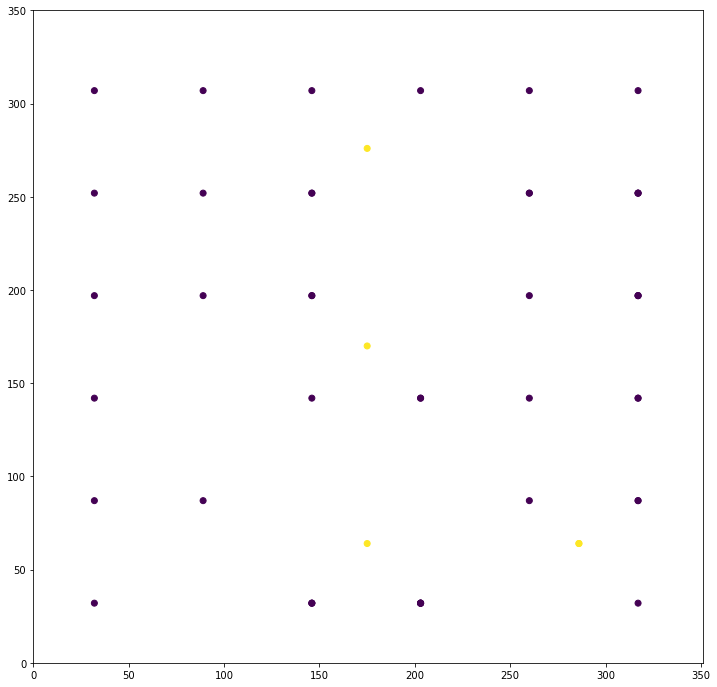

In [7]:
fig, ax = plt.subplots(1,1, figsize = (12,12))
plot_2D_patches(p2d, ax)

In [9]:
p2d = p2d.sort_by_feature(ife = 0)
z_idxs_unique = np.unique(z_idxs)

In [10]:
for z_idx in z_idxs_unique:
    p2d-+_z = p2d.filter_by_condition(p2d.features[:,0] == z_idx)
    print("index %i, number of patches: %i"%(z_idx, len(p2d_z)))

index 0, number of patches: 12
index 57, number of patches: 4
index 111, number of patches: 2
index 114, number of patches: 7
index 171, number of patches: 5
index 222, number of patches: 1
index 228, number of patches: 10
index 285, number of patches: 9
